In [2]:
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn import manifold
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
import matplotlib.pyplot as plt
import pickle

class Arrow3D(FancyArrowPatch):

    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        FancyArrowPatch.draw(self, renderer)

# hidden trace

(22, 100)
(21, 100)
(21, 100)
(64, 100)


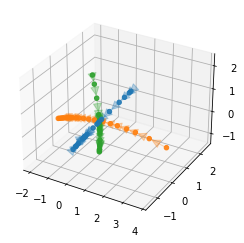

In [6]:
# P矩阵旋转，分块B
# "--gpu", "0", "--lr", "0.01", "--approach", "edfsnn", "--nhid", "100", "--nepochs", "50", "--experiment", "mnist_classIL", "--nlayers", "1", "--sbatch", "256", "--lr_factor", "1", "--output", "xxxx", "--seed", "0"

# 正确率 100， 100， 100
# https://is7lwmjos4.feishu.cn/sheets/shtcnGdyAwjEfOPKZbeZr7Iivsh?from=from_copylink

with open("E:/Study/Data/essaycode/EAST/output_data/trace_hidden_train.pkl", 'rb') as f:
    x = pickle.load(f)
y = []
yy = []
for i in range(len(x)):
    yy = []
    yy.append(x[i][0].cpu().detach().numpy())
    yy.append(x[i][1].cpu().detach().numpy())
    y.append(yy)
task1 = []
task2 = []
task3 = []
for i in range(len(y)):
    if y[i][0] == 0:
        task1.append(y[i][1])
    if y[i][0] == 1:
        task2.append(y[i][1])
    if y[i][0] == 2:
        task3.append(y[i][1])
task1 = np.array(task1)
task2 = np.array(task2)
task3 = np.array(task3)
y = []
for i in range(0,task1.shape[0],20):
    y.append(task1[i:i+20,:,:].mean(0))
task1 = np.array(y)[1:len(y)//2]
task1 = task1.mean(1)
print(task1.shape)
y = []
for i in range(0,task2.shape[0],20):
    y.append(task2[i:i+20,:,:].mean(0))
task2 = np.array(y)[1:len(y)//2]
task2 = task2.mean(1)
print(task2.shape)
y = []
for i in range(0,task3.shape[0],20):
    y.append(task3[i:i+20,:,:].mean(0))
task3 = np.array(y)[1:len(y)//2]
task3 = task3.mean(1)
print(task3.shape)

x = np.r_[task1,task2,task3]
print(x.shape)
x_ = manifold.Isomap(n_components=3).fit_transform(x)
x2 = x_[0:task1.shape[0]]
x3 = x_[task1.shape[0]:task1.shape[0]+task2.shape[0]]
x4 = x_[task1.shape[0]+task2.shape[0]:task1.shape[0]+task2.shape[0]+task3.shape[0]]

colors=['C{}'.format(x) for x in range(10)]

j=0
ax = plt.axes(projection='3d')  # 设置三维轴
X1 = x2[:,0]
Y1 = x2[:,1]
Z1 = x2[:,2]
ax.scatter3D(X1, Y1, Z1,color=colors[j],alpha=.9)  # 三个数组对应三个维度（三个数组中的数一一对应）
for i in range(0,X1.shape[0]-1):
    a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j], alpha=.3)#, linestyle="dashed")
    ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.show()

j=1
# ax = plt.axes(projection='3d')  # 设置三维轴
X1 = x3[:,0]
Y1 = x3[:,1]
Z1 = x3[:,2]
ax.scatter3D(X1, Y1, Z1,color=colors[j],alpha=.9)  # 三个数组对应三个维度（三个数组中的数一一对应）
for i in range(0,X1.shape[0]-1):
    a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j], alpha=.3)#, linestyle="dashed")
    ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.show()
    
j=2
# ax = plt.axes(projection='3d')  # 设置三维轴
X1 = x4[:,0]
Y1 = x4[:,1] 
Z1 = x4[:,2]
ax.scatter3D(X1, Y1, Z1,color=colors[j],alpha=.9)  # 三个数组对应三个维度（三个数组中的数一一对应）
for i in range(0,X1.shape[0]-1):
    a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j], alpha=.3)#, linestyle="dashed")
    ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.show()
    
# ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.savefig('C:\code\EDF图\incremental/iso123_20220507.svg')
plt.show()

In [ ]:
# test

In [ ]:
# P矩阵旋转，分块B
# "--gpu", "0", "--lr", "0.01", "--approach", "edfsnn", "--nhid", "100", "--nepochs", "50", "--experiment", "mnist_classIL", "--nlayers", "1", "--sbatch", "256", "--lr_factor", "1", "--output", "xxxx", "--seed", "0"

# 正确率 100， 100， 100
# https://is7lwmjos4.feishu.cn/sheets/shtcnGdyAwjEfOPKZbeZr7Iivsh?from=from_copylink

with open("E:/Study/Data/essaycode/EAST/output_data/trace_hidden_train.pkl", 'rb') as f:
    x = pickle.load(f)
y = []
yy = []
for i in range(len(x)):
    yy = []
    yy.append(x[i][0].cpu().detach().numpy())
    yy.append(x[i][1].cpu().detach().numpy())
    y.append(yy)
task1 = []
task2 = []
task3 = []
for i in range(len(y)):
    if y[i][0] == 0:
        task1.append(y[i][1])
    if y[i][0] == 1:
        task2.append(y[i][1])
    if y[i][0] == 2:
        task3.append(y[i][1])
task1 = np.array(task1)
task2 = np.array(task2)
task3 = np.array(task3)
y = []
for i in range(0,task1.shape[0],20):
    y.append(task1[i:i+20,:,:].mean(0))
task1 = np.array(y)[1:len(y)//2]
task1 = task1.mean(1)
print(task1.shape)
y = []
for i in range(0,task2.shape[0],20):
    y.append(task2[i:i+20,:,:].mean(0))
task2 = np.array(y)[1:len(y)//2]
task2 = task2.mean(1)
print(task2.shape)
y = []
for i in range(0,task3.shape[0],20):
    y.append(task3[i:i+20,:,:].mean(0))
task3 = np.array(y)[1:len(y)//2]
task3 = task3.mean(1)
print(task3.shape)

x = np.r_[task1,task2,task3]
print(x.shape)
x_ = manifold.Isomap(n_components=3).fit_transform(x)
x2 = x_[0:task1.shape[0]]
x3 = x_[task1.shape[0]:task1.shape[0]+task2.shape[0]]
x4 = x_[task1.shape[0]+task2.shape[0]:task1.shape[0]+task2.shape[0]+task3.shape[0]]

colors=['C{}'.format(x) for x in range(10)]

j=0
ax = plt.axes(projection='3d')  # 设置三维轴
X1 = x2[:,0]
Y1 = x2[:,1]
Z1 = x2[:,2]
ax.scatter3D(X1, Y1, Z1,color=colors[j],alpha=.9)  # 三个数组对应三个维度（三个数组中的数一一对应）
for i in range(0,X1.shape[0]-1):
    a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j], alpha=.3)#, linestyle="dashed")
    ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.show()

j=1
# ax = plt.axes(projection='3d')  # 设置三维轴
X1 = x3[:,0]
Y1 = x3[:,1]
Z1 = x3[:,2]
ax.scatter3D(X1, Y1, Z1,color=colors[j],alpha=.9)  # 三个数组对应三个维度（三个数组中的数一一对应）
for i in range(0,X1.shape[0]-1):
    a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j], alpha=.3)#, linestyle="dashed")
    ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.show()
    
j=2
# ax = plt.axes(projection='3d')  # 设置三维轴
X1 = x4[:,0]
Y1 = x4[:,1] 
Z1 = x4[:,2]
ax.scatter3D(X1, Y1, Z1,color=colors[j],alpha=.9)  # 三个数组对应三个维度（三个数组中的数一一对应）
for i in range(0,X1.shape[0]-1):
    a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j], alpha=.3)#, linestyle="dashed")
    ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.show()
    
# ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.savefig('C:\code\EDF图\incremental/iso123_20220507.svg')
plt.show()

(22, 100)
(21, 100)
(21, 100)
(64, 100)


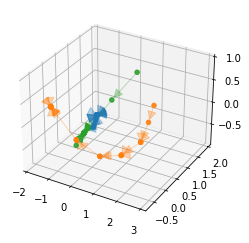

In [5]:
# P矩阵旋转，uniform B
# "--gpu", "0", "--lr", "0.01", "--approach", "edfsnn", "--nhid", "100", "--nepochs", "50", "--experiment", "mnist_classIL", "--nlayers", "1", "--sbatch", "256", "--lr_factor", "1", "--output", "xxxx", "--seed", "0", "--B_type", "Uniform", "--trace_name", "trace_train_B_Uniform", "--phase", "train"

# 正确率 100, 0, 100
# https://is7lwmjos4.feishu.cn/sheets/shtcnGdyAwjEfOPKZbeZr7Iivsh?from=from_copylink

with open("E:/Study/Data/essaycode/EAST/output_data/trace_train_B_Uniform.pkl", 'rb') as f:
    x = pickle.load(f)
y = []
yy = []
for i in range(len(x)):
    yy = []
    yy.append(x[i][0].cpu().detach().numpy())
    yy.append(x[i][1].cpu().detach().numpy())
    y.append(yy)
task1 = []
task2 = []
task3 = []
for i in range(len(y)):
    if y[i][0] == 0:
        task1.append(y[i][1])
    if y[i][0] == 1:
        task2.append(y[i][1])
    if y[i][0] == 2:
        task3.append(y[i][1])
task1 = np.array(task1)
task2 = np.array(task2)
task3 = np.array(task3)
y = []
for i in range(0,task1.shape[0],20):
    y.append(task1[i:i+20,:,:].mean(0))
task1 = np.array(y)[1:len(y)//2]
task1 = task1.mean(1)
print(task1.shape)
y = []
for i in range(0,task2.shape[0],20):
    y.append(task2[i:i+20,:,:].mean(0))
task2 = np.array(y)[1:len(y)//2]
task2 = task2.mean(1)
print(task2.shape)
y = []
for i in range(0,task3.shape[0],20):
    y.append(task3[i:i+20,:,:].mean(0))
task3 = np.array(y)[1:len(y)//2]
task3 = task3.mean(1)
print(task3.shape)

x = np.r_[task1,task2,task3]
print(x.shape)
x_ = manifold.Isomap(n_components=3).fit_transform(x)
x2 = x_[0:task1.shape[0]]
x3 = x_[task1.shape[0]:task1.shape[0]+task2.shape[0]]
x4 = x_[task1.shape[0]+task2.shape[0]:task1.shape[0]+task2.shape[0]+task3.shape[0]]

colors=['C{}'.format(x) for x in range(10)]

j=0
ax = plt.axes(projection='3d')  # 设置三维轴
X1 = x2[:,0]
Y1 = x2[:,1]
Z1 = x2[:,2]
ax.scatter3D(X1, Y1, Z1,color=colors[j],alpha=.9)  # 三个数组对应三个维度（三个数组中的数一一对应）
for i in range(0,X1.shape[0]-1):
    a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j], alpha=.3)#, linestyle="dashed")
    ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.show()

j=1
# ax = plt.axes(projection='3d')  # 设置三维轴
X1 = x3[:,0]
Y1 = x3[:,1]
Z1 = x3[:,2]
ax.scatter3D(X1, Y1, Z1,color=colors[j],alpha=.9)  # 三个数组对应三个维度（三个数组中的数一一对应）
for i in range(0,X1.shape[0]-1):
    a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j], alpha=.3)#, linestyle="dashed")
    ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.show()
    
j=2
# ax = plt.axes(projection='3d')  # 设置三维轴
X1 = x4[:,0]
Y1 = x4[:,1] 
Z1 = x4[:,2]
ax.scatter3D(X1, Y1, Z1,color=colors[j],alpha=.9)  # 三个数组对应三个维度（三个数组中的数一一对应）
for i in range(0,X1.shape[0]-1):
    a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j], alpha=.3)#, linestyle="dashed")
    ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.show()
    
# ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.savefig('C:\code\EDF图\incremental/iso123_20220507.svg')
plt.show()

In [ ]:
# test

In [ ]:
# P矩阵旋转，uniform B
# "--gpu", "0", "--lr", "0.01", "--approach", "edfsnn", "--nhid", "100", "--nepochs", "50", "--experiment", "mnist_classIL", "--nlayers", "1", "--sbatch", "256", "--lr_factor", "1", "--output", "xxxx", "--seed", "0", "--B_type", "Uniform", "--trace_name", "trace_test_B_uniform.pkl", "--phase", "test"

# 正确率 100, 0, 100
# https://is7lwmjos4.feishu.cn/sheets/shtcnGdyAwjEfOPKZbeZr7Iivsh?from=from_copylink

with open("E:/Study/Data/essaycode/EAST/output_data/trace_train_B_Uniform.pkl", 'rb') as f:
    x = pickle.load(f)
y = []
yy = []
for i in range(len(x)):
    yy = []
    yy.append(x[i][0].cpu().detach().numpy())
    yy.append(x[i][1].cpu().detach().numpy())
    y.append(yy)
task1 = []
task2 = []
task3 = []
for i in range(len(y)):
    if y[i][0] == 0:
        task1.append(y[i][1])
    if y[i][0] == 1:
        task2.append(y[i][1])
    if y[i][0] == 2:
        task3.append(y[i][1])
task1 = np.array(task1)
task2 = np.array(task2)
task3 = np.array(task3)
y = []
for i in range(0,task1.shape[0],20):
    y.append(task1[i:i+20,:,:].mean(0))
task1 = np.array(y)[1:len(y)//2]
task1 = task1.mean(1)
print(task1.shape)
y = []
for i in range(0,task2.shape[0],20):
    y.append(task2[i:i+20,:,:].mean(0))
task2 = np.array(y)[1:len(y)//2]
task2 = task2.mean(1)
print(task2.shape)
y = []
for i in range(0,task3.shape[0],20):
    y.append(task3[i:i+20,:,:].mean(0))
task3 = np.array(y)[1:len(y)//2]
task3 = task3.mean(1)
print(task3.shape)

x = np.r_[task1,task2,task3]
print(x.shape)
x_ = manifold.Isomap(n_components=3).fit_transform(x)
x2 = x_[0:task1.shape[0]]
x3 = x_[task1.shape[0]:task1.shape[0]+task2.shape[0]]
x4 = x_[task1.shape[0]+task2.shape[0]:task1.shape[0]+task2.shape[0]+task3.shape[0]]

colors=['C{}'.format(x) for x in range(10)]

j=0
ax = plt.axes(projection='3d')  # 设置三维轴
X1 = x2[:,0]
Y1 = x2[:,1]
Z1 = x2[:,2]
ax.scatter3D(X1, Y1, Z1,color=colors[j],alpha=.9)  # 三个数组对应三个维度（三个数组中的数一一对应）
for i in range(0,X1.shape[0]-1):
    a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j], alpha=.3)#, linestyle="dashed")
    ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.show()

j=1
# ax = plt.axes(projection='3d')  # 设置三维轴
X1 = x3[:,0]
Y1 = x3[:,1]
Z1 = x3[:,2]
ax.scatter3D(X1, Y1, Z1,color=colors[j],alpha=.9)  # 三个数组对应三个维度（三个数组中的数一一对应）
for i in range(0,X1.shape[0]-1):
    a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j], alpha=.3)#, linestyle="dashed")
    ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.show()
    
j=2
# ax = plt.axes(projection='3d')  # 设置三维轴
X1 = x4[:,0]
Y1 = x4[:,1] 
Z1 = x4[:,2]
ax.scatter3D(X1, Y1, Z1,color=colors[j],alpha=.9)  # 三个数组对应三个维度（三个数组中的数一一对应）
for i in range(0,X1.shape[0]-1):
    a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j], alpha=.3)#, linestyle="dashed")
    ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.show()
    
# ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.savefig('C:\code\EDF图\incremental/iso123_20220507.svg')
plt.show()

2680
(22, 100)
(21, 100)
(21, 100)
(64, 100)


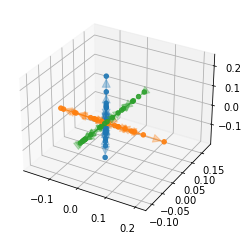

In [14]:
# 无p矩阵，region B
# "--gpu", "0", "--lr", "0.01", "--approach", "edfsnn", "--nhid", "100", "--nepochs", "50", "--experiment", "mnist_classIL", "--nlayers", "1", "--sbatch", "256", "--lr_factor", "1", "--output", "xxxx", "--seed", "0", "--B_type", "Uniform", "--trace_name", "trace_train_B_Uniform", "--phase", "train"

# 正确率 8.3, 86.5, 100
# https://is7lwmjos4.feishu.cn/sheets/shtcnGdyAwjEfOPKZbeZr7Iivsh?from=from_copylink

with open("E:/Study/Data/essaycode/EAST/output_data/trace_train_B_region_withoutP.pkl", 'rb') as f:
    x = pickle.load(f)
print(len(x))
y = []
yy = []
for i in range(len(x)):
    yy = []
    yy.append(x[i][0].cpu().detach().numpy())
    yy.append(x[i][1].cpu().detach().numpy())
    y.append(yy)
task1 = []
task2 = []
task3 = []
for i in range(len(y)):
    if y[i][0] == 0:
        task1.append(y[i][1])
    if y[i][0] == 1:
        task2.append(y[i][1])
    if y[i][0] == 2:
        task3.append(y[i][1])
task1 = np.array(task1)
task2 = np.array(task2)
task3 = np.array(task3)
y = []
for i in range(0,task1.shape[0],20):
    y.append(task1[i:i+20,:,:].mean(0))
task1 = np.array(y)[1:len(y)//2]
task1 = task1.mean(1)
print(task1.shape)
y = []
for i in range(0,task2.shape[0],20):
    y.append(task2[i:i+20,:,:].mean(0))
task2 = np.array(y)[1:len(y)//2]
task2 = task2.mean(1)
print(task2.shape)
y = []
for i in range(0,task3.shape[0],20):
    y.append(task3[i:i+20,:,:].mean(0))
task3 = np.array(y)[1:len(y)//2]
task3 = task3.mean(1)
print(task3.shape)

x = np.r_[task1,task2,task3]
print(x.shape)
x_ = manifold.Isomap(n_components=3).fit_transform(x)
x2 = x_[0:task1.shape[0]]
x3 = x_[task1.shape[0]:task1.shape[0]+task2.shape[0]]
x4 = x_[task1.shape[0]+task2.shape[0]:task1.shape[0]+task2.shape[0]+task3.shape[0]]

colors=['C{}'.format(x) for x in range(10)]

j=0
ax = plt.axes(projection='3d')  # 设置三维轴
X1 = x2[:,0]
Y1 = x2[:,1]
Z1 = x2[:,2]
ax.scatter3D(X1, Y1, Z1,color=colors[j],alpha=.9)  # 三个数组对应三个维度（三个数组中的数一一对应）
for i in range(0,X1.shape[0]-1):
    a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j], alpha=.3)#, linestyle="dashed")
    ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.show()

j=1
# ax = plt.axes(projection='3d')  # 设置三维轴
X1 = x3[:,0]
Y1 = x3[:,1]
Z1 = x3[:,2]
ax.scatter3D(X1, Y1, Z1,color=colors[j],alpha=.9)  # 三个数组对应三个维度（三个数组中的数一一对应）
for i in range(0,X1.shape[0]-1):
    a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j], alpha=.3)#, linestyle="dashed")
    ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.show()
    
j=2
# ax = plt.axes(projection='3d')  # 设置三维轴
X1 = x4[:,0]
Y1 = x4[:,1] 
Z1 = x4[:,2]
ax.scatter3D(X1, Y1, Z1,color=colors[j],alpha=.9)  # 三个数组对应三个维度（三个数组中的数一一对应）
for i in range(0,X1.shape[0]-1):
    a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j], alpha=.3)#, linestyle="dashed")
    ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.show()
    
# ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.savefig('C:\code\EDF图\incremental/iso123_20220507.svg')
plt.show()

In [11]:
#test

In [16]:
# 无p矩阵，region B
# "--gpu", "0", "--lr", "0.01", "--approach", "edfsnn", "--nhid", "100", "--nepochs", "50", "--experiment", "mnist_classIL", "--nlayers", "1", "--sbatch", "256", "--lr_factor", "1", "--output", "xxxx", "--seed", "0", "--B_type", "Regions_Standard", "--trace_name", "trace_test_B_region_withoutP", "--phase", "test", "--without_P"

# 正确率 8.3, 86.5, 100
# https://is7lwmjos4.feishu.cn/sheets/shtcnGdyAwjEfOPKZbeZr7Iivsh?from=from_copylink

with open("E:/Study/Data/essaycode/EAST/output_data/trace_test_B_region_withoutP.pkl", 'rb') as f:
    x = pickle.load(f)
print(len(x))
y = []
yy = []
for i in range(len(x)):
    yy = []
    yy.append(x[i][0].cpu().detach().numpy())
    yy.append(x[i][1].cpu().detach().numpy())
    y.append(yy)
task1 = []
task2 = []
task3 = []
for i in range(len(y)):
    if y[i][0] == 0:
        task1.append(y[i][1])
    if y[i][0] == 1:
        task2.append(y[i][1])
    if y[i][0] == 2:
        task3.append(y[i][1])
task1 = np.array(task1)
task2 = np.array(task2)
task3 = np.array(task3)
y = []
for i in range(0,task1.shape[0],20):
    y.append(task1[i:i+20,:,:].mean(0))
task1 = np.array(y)[1:len(y)//2]
task1 = task1.mean(1)
print(task1.shape)
y = []
for i in range(0,task2.shape[0],20):
    y.append(task2[i:i+20,:,:].mean(0))
task2 = np.array(y)[1:len(y)//2]
task2 = task2.mean(1)
print(task2.shape)
y = []
for i in range(0,task3.shape[0],20):
    y.append(task3[i:i+20,:,:].mean(0))
task3 = np.array(y)[1:len(y)//2]
task3 = task3.mean(1)
print(task3.shape)

x = np.r_[task1,task2,task3]
print(x.shape)
x_ = manifold.Isomap(n_components=3).fit_transform(x)
x2 = x_[0:task1.shape[0]]
x3 = x_[task1.shape[0]:task1.shape[0]+task2.shape[0]]
x4 = x_[task1.shape[0]+task2.shape[0]:task1.shape[0]+task2.shape[0]+task3.shape[0]]

colors=['C{}'.format(x) for x in range(10)]

j=0
ax = plt.axes(projection='3d')  # 设置三维轴
X1 = x2[:,0]
Y1 = x2[:,1]
Z1 = x2[:,2]
ax.scatter3D(X1, Y1, Z1,color=colors[j],alpha=.9)  # 三个数组对应三个维度（三个数组中的数一一对应）
for i in range(0,X1.shape[0]-1):
    a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j], alpha=.3)#, linestyle="dashed")
    ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.show()

j=1
# ax = plt.axes(projection='3d')  # 设置三维轴
X1 = x3[:,0]
Y1 = x3[:,1]
Z1 = x3[:,2]
ax.scatter3D(X1, Y1, Z1,color=colors[j],alpha=.9)  # 三个数组对应三个维度（三个数组中的数一一对应）
for i in range(0,X1.shape[0]-1):
    a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j], alpha=.3)#, linestyle="dashed")
    ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.show()
    
j=2
# ax = plt.axes(projection='3d')  # 设置三维轴
X1 = x4[:,0]
Y1 = x4[:,1] 
Z1 = x4[:,2]
ax.scatter3D(X1, Y1, Z1,color=colors[j],alpha=.9)  # 三个数组对应三个维度（三个数组中的数一一对应）
for i in range(0,X1.shape[0]-1):
    a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j], alpha=.3)#, linestyle="dashed")
    ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.show()
    
# ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.savefig('C:\code\EDF图\incremental/iso123_20220507.svg')
plt.show()

200
(2, 100)
(1, 100)
(1, 100)
(4, 100)


ValueError: Expected n_neighbors <= n_samples,  but n_samples = 4, n_neighbors = 6

In [ ]:
# train

(22, 100)
(21, 100)
(21, 100)
(64, 100)


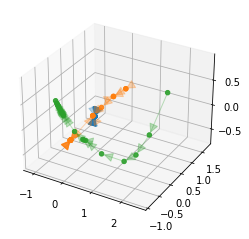

In [8]:
# 无p矩阵，uniform B
# "--gpu", "0", "--lr", "0.01", "--approach", "edfsnn", "--nhid", "100", "--nepochs", "50", "--experiment", "mnist_classIL", "--nlayers", "1", "--sbatch", "256", "--lr_factor", "1", "--output", "xxxx", "--seed", "0", "--B_type", "Uniform", "--trace_name", "trace_train_B_Uniform", "--phase", "train"

# 正确率 95.3, 100, 100
# https://is7lwmjos4.feishu.cn/sheets/shtcnGdyAwjEfOPKZbeZr7Iivsh?from=from_copylink

with open("E:/Study/Data/essaycode/EAST/output_data/trace_train_B_uniform_withoutP.pkl", 'rb') as f:
    x = pickle.load(f)
y = []
yy = []
for i in range(len(x)):
    yy = []
    yy.append(x[i][0].cpu().detach().numpy())
    yy.append(x[i][1].cpu().detach().numpy())
    y.append(yy)
task1 = []
task2 = []
task3 = []
for i in range(len(y)):
    if y[i][0] == 0:
        task1.append(y[i][1])
    if y[i][0] == 1:
        task2.append(y[i][1])
    if y[i][0] == 2:
        task3.append(y[i][1])
task1 = np.array(task1)
task2 = np.array(task2)
task3 = np.array(task3)
y = []
for i in range(0,task1.shape[0],20):
    y.append(task1[i:i+20,:,:].mean(0))
task1 = np.array(y)[1:len(y)//2]
task1 = task1.mean(1)
print(task1.shape)
y = []
for i in range(0,task2.shape[0],20):
    y.append(task2[i:i+20,:,:].mean(0))
task2 = np.array(y)[1:len(y)//2]
task2 = task2.mean(1)
print(task2.shape)
y = []
for i in range(0,task3.shape[0],20):
    y.append(task3[i:i+20,:,:].mean(0))
task3 = np.array(y)[1:len(y)//2]
task3 = task3.mean(1)
print(task3.shape)

x = np.r_[task1,task2,task3]
print(x.shape)
x_ = manifold.Isomap(n_components=3).fit_transform(x)
x2 = x_[0:task1.shape[0]]
x3 = x_[task1.shape[0]:task1.shape[0]+task2.shape[0]]
x4 = x_[task1.shape[0]+task2.shape[0]:task1.shape[0]+task2.shape[0]+task3.shape[0]]

colors=['C{}'.format(x) for x in range(10)]

j=0
ax = plt.axes(projection='3d')  # 设置三维轴
X1 = x2[:,0]
Y1 = x2[:,1]
Z1 = x2[:,2]
ax.scatter3D(X1, Y1, Z1,color=colors[j],alpha=.9)  # 三个数组对应三个维度（三个数组中的数一一对应）
for i in range(0,X1.shape[0]-1):
    a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j], alpha=.3)#, linestyle="dashed")
    ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.show()

j=1
# ax = plt.axes(projection='3d')  # 设置三维轴
X1 = x3[:,0]
Y1 = x3[:,1]
Z1 = x3[:,2]
ax.scatter3D(X1, Y1, Z1,color=colors[j],alpha=.9)  # 三个数组对应三个维度（三个数组中的数一一对应）
for i in range(0,X1.shape[0]-1):
    a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j], alpha=.3)#, linestyle="dashed")
    ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.show()
    
j=2
# ax = plt.axes(projection='3d')  # 设置三维轴
X1 = x4[:,0]
Y1 = x4[:,1] 
Z1 = x4[:,2]
ax.scatter3D(X1, Y1, Z1,color=colors[j],alpha=.9)  # 三个数组对应三个维度（三个数组中的数一一对应）
for i in range(0,X1.shape[0]-1):
    a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j], alpha=.3)#, linestyle="dashed")
    ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.show()
    
# ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.savefig('C:\code\EDF图\incremental/iso123_20220507.svg')
plt.show()

In [9]:
# test

2680
(22, 100)
(21, 100)
(21, 100)
(64, 100)


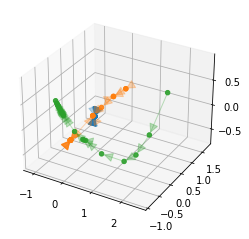

In [10]:
# 无p矩阵，uniform B
# "--gpu", "0", "--lr", "0.01", "--approach", "edfsnn", "--nhid", "100", "--nepochs", "50", "--experiment", "mnist_classIL", "--nlayers", "1", "--sbatch", "256", "--lr_factor", "1", "--output", "xxxx", "--seed", "0", "--B_type", "Uniform", "--trace_name", "trace_test_B_uniform_withoutP", "--phase", "test", "--without_P"

# 正确率 95.3, 100, 100
# https://is7lwmjos4.feishu.cn/sheets/shtcnGdyAwjEfOPKZbeZr7Iivsh?from=from_copylink

with open("E:/Study/Data/essaycode/EAST/output_data/trace_test_B_uniform_withoutP.pkl", 'rb') as f:
    x = pickle.load(f)
print(len(x))
y = []
yy = []
for i in range(len(x)):
    yy = []
    yy.append(x[i][0].cpu().detach().numpy())
    yy.append(x[i][1].cpu().detach().numpy())
    y.append(yy)
task1 = []
task2 = []
task3 = []
for i in range(len(y)):
    if y[i][0] == 0:
        task1.append(y[i][1])
    if y[i][0] == 1:
        task2.append(y[i][1])
    if y[i][0] == 2:
        task3.append(y[i][1])
task1 = np.array(task1)
task2 = np.array(task2)
task3 = np.array(task3)
y = []
for i in range(0,task1.shape[0],20):
    y.append(task1[i:i+20,:,:].mean(0))
task1 = np.array(y)[1:len(y)//2]
task1 = task1.mean(1)
print(task1.shape)
y = []
for i in range(0,task2.shape[0],20):
    y.append(task2[i:i+20,:,:].mean(0))
task2 = np.array(y)[1:len(y)//2]
task2 = task2.mean(1)
print(task2.shape)
y = []
for i in range(0,task3.shape[0],20):
    y.append(task3[i:i+20,:,:].mean(0))
task3 = np.array(y)[1:len(y)//2]
task3 = task3.mean(1)
print(task3.shape)

x = np.r_[task1,task2,task3]
print(x.shape)
x_ = manifold.Isomap(n_components=3).fit_transform(x)
x2 = x_[0:task1.shape[0]]
x3 = x_[task1.shape[0]:task1.shape[0]+task2.shape[0]]
x4 = x_[task1.shape[0]+task2.shape[0]:task1.shape[0]+task2.shape[0]+task3.shape[0]]

colors=['C{}'.format(x) for x in range(10)]

j=0
ax = plt.axes(projection='3d')  # 设置三维轴
X1 = x2[:,0]
Y1 = x2[:,1]
Z1 = x2[:,2]
ax.scatter3D(X1, Y1, Z1,color=colors[j],alpha=.9)  # 三个数组对应三个维度（三个数组中的数一一对应）
for i in range(0,X1.shape[0]-1):
    a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j], alpha=.3)#, linestyle="dashed")
    ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.show()

j=1
# ax = plt.axes(projection='3d')  # 设置三维轴
X1 = x3[:,0]
Y1 = x3[:,1]
Z1 = x3[:,2]
ax.scatter3D(X1, Y1, Z1,color=colors[j],alpha=.9)  # 三个数组对应三个维度（三个数组中的数一一对应）
for i in range(0,X1.shape[0]-1):
    a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j], alpha=.3)#, linestyle="dashed")
    ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.show()
    
j=2
# ax = plt.axes(projection='3d')  # 设置三维轴
X1 = x4[:,0]
Y1 = x4[:,1] 
Z1 = x4[:,2]
ax.scatter3D(X1, Y1, Z1,color=colors[j],alpha=.9)  # 三个数组对应三个维度（三个数组中的数一一对应）
for i in range(0,X1.shape[0]-1):
    a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j], alpha=.3)#, linestyle="dashed")
    ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.show()
    
# ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.savefig('C:\code\EDF图\incremental/iso123_20220507.svg')
plt.show()